In [ ]:
import numpy as np
import pandas as pd
import json
from pathlib import Path

In [ ]:
model_id = '20211014143136'
dataset_id = '20211018_only' # validate using data created after the model was trained
path = Path('../data')

In [ ]:
df = pd.read_csv(path/f'data_{dataset_id}.csv')
df_raw = df.copy()
with open(path/f'stats_data_{model_id}.json', 'r') as f:
    stats = json.load(f)

In [ ]:
# make all x and y values relative to tip of nose
for i in range(468):
    df[f'{i}x']=df[f'{i}x']-df['1x']
    df[f'{i}y']=df[f'{i}y']-df['1y']

In [ ]:
# normalize
for i in range(468):
    if i == 1: continue # it's all zeros
    for coord in ['x','y','z']:
        col=f'{i}{coord}'
        df[col]=df[col]-stats[col]['mean']
        df[col]=df[col]/stats[col]['std']

In [ ]:
df

,img_path,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,465x,465y,465z,466x,466y,466z,467x,467y,467z,expression_id
0,20211018120201_1.jpeg,-0.035951,0.406456,0.482233,0.0,0.0,-0.062170,-0.444656,-0.184539,0.503369,...,-0.475401,-0.027435,-0.411144,-0.527005,0.015113,-0.175675,-0.542347,0.075381,-0.169735,0
1,20211018120201_2.jpeg,-0.309576,-0.431210,0.634689,0.0,0.0,-0.061859,-0.432161,-0.033625,0.557565,...,-0.434748,-0.019508,-0.348665,-0.474925,-0.036131,-0.150338,-0.488598,0.048493,-0.152664,0
2,20211018120201_3.jpeg,-0.325314,-0.116897,0.730793,0.0,0.0,-0.061060,-0.422585,-0.106342,0.740138,...,-0.425133,-0.079107,-0.381672,-0.487124,-0.028934,-0.176516,-0.504490,0.062990,-0.174919,0
3,20211018120201_4.jpeg,-0.346470,-0.216063,0.488655,0.0,0.0,-0.062072,-0.391522,-0.122656,0.435213,...,-0.385960,-0.107426,-0.237963,-0.436343,-0.046656,-0.082709,-0.453215,0.051882,-0.087467,0
4,20211018120201_5.jpeg,-0.378920,0.003368,0.368714,0.0,0.0,-0.061657,-0.359055,-0.177431,0.407323,...,-0.356265,-0.125250,-0.068260,-0.404496,-0.054999,0.034137,-0.420632,0.034878,0.027610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211018120732_496.jpeg,-1.819103,0.740418,-2.591325,0.0,0.0,-0.069956,0.839128,-2.152437,-3.270289,...,0.870089,-2.134986,1.949189,0.830828,-1.788681,1.888837,0.867596,-1.760101,1.889760,3
1996,20211018120732_497.jpeg,-1.673006,0.575643,-2.405995,0.0,0.0,-0.069621,0.774264,-2.114274,-3.061094,...,0.800448,-2.070877,1.730410,0.763018,-1.724026,1.727469,0.798047,-1.705592,1.732719,3
1997,20211018120732_498.jpeg,-1.702934,0.616818,-2.264715,0.0,0.0,-0.069020,0.743843,-2.071112,-2.931137,...,0.756354,-2.044120,1.675849,0.691163,-1.718267,1.649191,0.723348,-1.698611,1.655601,3
1998,20211018120732_499.jpeg,-1.652944,0.372098,-2.388590,0.0,0.0,-0.069994,0.704610,-2.040924,-3.143658,...,0.719010,-2.007488,1.693132,0.667980,-1.671778,1.688110,0.700016,-1.644779,1.691007,3


In [ ]:
face_point_ids = [5, 2, 218, 438] # up,down,left,right - no point having 1 tip_of_nose as it's always 0
mouth_landmarks = [0, 11, 12, 13, 14, 15, 16, 17, 18, 37, 38, 39, 40, 41, 42, 43, 57, 61, 62, 72, 73, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 106, 146, 164, 165, 167, 178, 179, 180, 181, 182, 183, 184, 185, 186, 191, 204, 267, 268, 269, 270, 271, 272, 273, 287, 291, 292, 302, 303, 304, 306, 307, 308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 335, 375, 391, 393, 402, 403, 404, 405, 406, 407, 408, 409, 410, 415, 424]
cont_names = []
for i in face_point_ids+mouth_landmarks:
    cont_names.append(f'{i}x')
    cont_names.append(f'{i}y')

In [ ]:
import pickle
class NpModelHelper:
    def __init__(self, path, model_id):
        self.model_id, self.path = model_id, path/f'model_{model_id}.pkl'
    def set_state(self, model):
        self.state_dict, state_dict = {}, learn.model.state_dict()
        for k in state_dict:
            self.state_dict[k] = state_dict[k].detach().cpu().numpy()
        return self
    def save(self):
        # can't set allow_pickle=False with np.savez https://github.com/numpy/numpy/issues/13983
        # so we might as well pickle and keep the dict order
        # TODO: don't need the dict order any more - go back to npz
        with open(self.path, 'wb') as f:
            pickle.dump(self.state_dict, f)
        return self
    def load(self):
        with open(self.path, 'rb') as f:
            self.state_dict = pickle.load(f)
        return self
    def get_state_dict(self, name_prefix):
        if name_prefix is None or name_prefix == '': 
            return self.state_dict
        return {k[len(name_prefix)+1:]:self.state_dict[k] 
                for k in self.state_dict 
                if k.startswith(name_prefix)}

In [ ]:
class NpBatchNorm1d:
    # https://github.com/pytorch/pytorch/blob/420b37f3c67950ed93cd8aa7a12e673fcfc5567b/aten/src/ATen/native/Normalization.cpp#L61-L126
    def __init__(self, weight, bias, running_mean, running_var, num_batches_tracked=None):
        self.weight, self.bias = weight, bias
        self.running_mean, self.running_std = running_mean, np.sqrt(running_var + 1e-5)
    def __call__(self, x):
        x = x - self.running_mean
        x = x / self.running_std
        x = x * self.weight
        x = x + self.bias
        return x

In [ ]:
class NpLinear:
    def __init__(self, weight, bias=None):
        self.weight, self.bias = weight.T, bias
    def __call__(self, x):
        x = x @ self.weight
        if self.bias is not None:
            x = x + self.bias
        return x

In [ ]:
class NpReLU:
    def __call__(self, x):
        return np.maximum(x, 0)

In [ ]:
class NpModel:
    def __init__(self, modules):
        self.modules = modules
    def __call__(self, x):
        for module in self.modules:
            x = module(x)
        return x

In [ ]:
np_model_helper = NpModelHelper(path, model_id).load()
np_model = NpModel([
                    NpBatchNorm1d(**np_model_helper.get_state_dict('bn_cont')),
                    NpLinear(**np_model_helper.get_state_dict('layers.0.0')),
                    NpReLU(),
                    NpBatchNorm1d(**np_model_helper.get_state_dict('layers.0.2')),
                    NpLinear(**np_model_helper.get_state_dict('layers.1.0')),
                    NpReLU(),
                    NpBatchNorm1d(**np_model_helper.get_state_dict('layers.1.2')),
                    NpLinear(**np_model_helper.get_state_dict('layers.2.0'))
                   ])

In [ ]:
for k in np_model_helper.state_dict:
    print(k, np_model_helper.state_dict[k].dtype)

bn_cont.weight float32
bn_cont.bias float32
bn_cont.running_mean float32
bn_cont.running_var float32
bn_cont.num_batches_tracked int64
layers.0.0.weight float32
layers.0.2.weight float32
layers.0.2.bias float32
layers.0.2.running_mean float32
layers.0.2.running_var float32
layers.0.2.num_batches_tracked int64
layers.1.0.weight float32
layers.1.2.weight float32
layers.1.2.bias float32
layers.1.2.running_mean float32
layers.1.2.running_var float32
layers.1.2.num_batches_tracked int64
layers.2.0.weight float32
layers.2.0.bias float32


In [ ]:
class_count = np_model.modules[-1].weight.shape[1]
class_count

4

In [ ]:
confusion_matrix = np.zeros([class_count,class_count], dtype=int)
output = np_model(df[cont_names].to_numpy())
preds = np.argmax(output, axis=1)
targets = df['expression_id'].to_numpy()
for p,t in zip(preds, targets):
    confusion_matrix[t][p]+=1

In [ ]:
with open('../data/viseme-config.json') as f: 
    config = json.load(f)
class_ids=[]
class_labels=[]
for i in range(len(config['expressions'])):
    class_ids.append(i)
    class_labels.append(config['expressions'][str(i)])
class_ids, class_labels

([0, 1, 2, 3, 4], ['No expression', 'oo', 'ee', 'ah', 'Random Talking'])

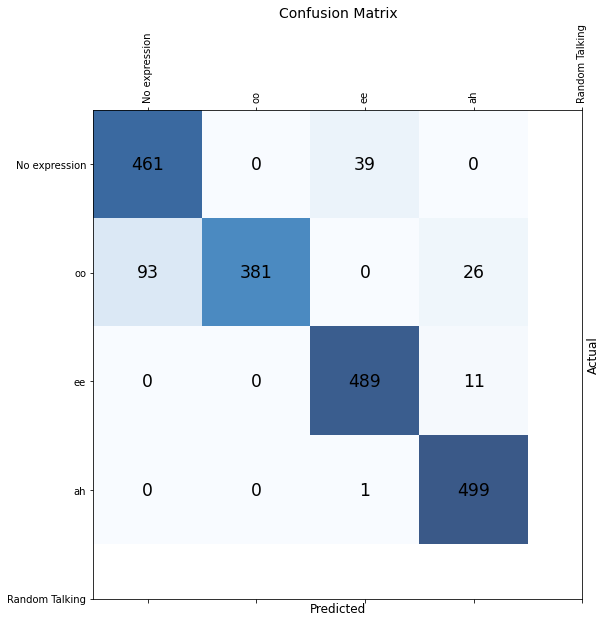

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.8)
# ax.xaxis.set_ticks_position('bottom') # must be after matshow
ax.yaxis.set_label_position('right')
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
tick_marks = np.arange(5)
# plt.xticks(tick_marks, self.data.y.classes, rotation=90)
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels, rotation=0)
plt.show()

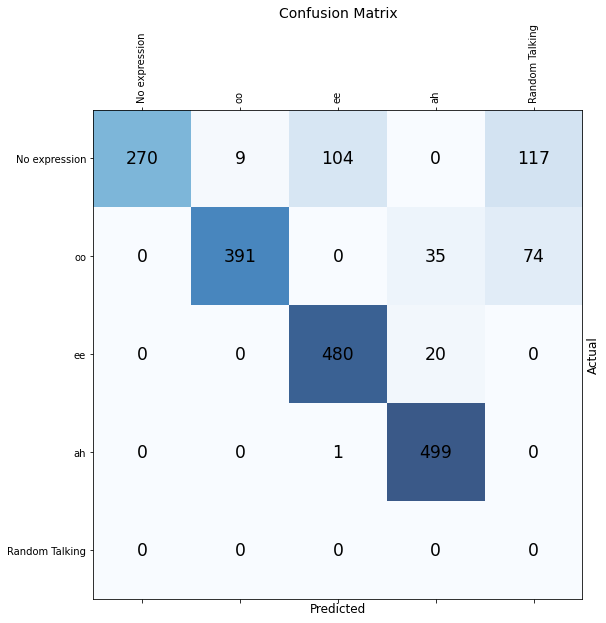

In [ ]:
#v2

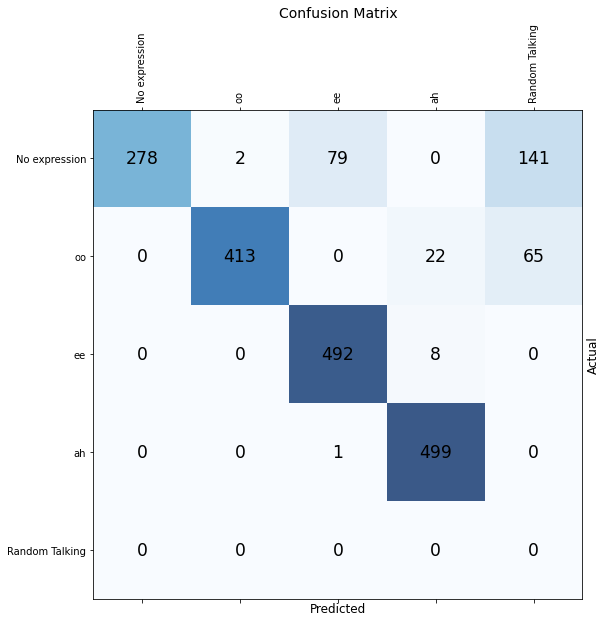

In [ ]:
#v1 conf mat

In [ ]:
%%time
np_model(df[cont_names][:2].to_numpy())

In [ ]:
output = np_model(df[cont_names].to_numpy())
preds = np.argmax(output, axis=1)
targets = df['expression_id'].to_numpy()
target_of_interest, pred_of_interest, idxs = 0,2,[]
print('target_of_interest', class_labels[target_of_interest], 'pred_of_interest', class_labels[pred_of_interest])
print('overall accuracy',(targets==preds).sum()/len(targets))
print('accuracy for target_of_interest',(targets[targets==target_of_interest]==preds[targets==target_of_interest]).sum()/len(targets[targets==target_of_interest]))
for i, (p,t) in enumerate(zip(preds,targets)):
    if t==target_of_interest and p==pred_of_interest:
        idxs.append(i)
#     if p!=t: print(i,'pred',p,'target',t)
df_raw.iloc[idxs]

target_of_interest No expression pred_of_interest ee
overall accuracy 0.915
accuracy for target_of_interest 0.922


,img_path,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,465x,465y,465z,466x,466y,466z,467x,467y,467z,expression_id
95,20211018120209_96.jpeg,0.450151,0.661957,-0.025238,0.447827,0.608664,-0.062817,0.448848,0.621326,-0.029743,...,0.468836,0.494582,-0.016335,0.537750,0.470511,0.003309,0.543469,0.463889,0.003204,0
111,20211018120211_112.jpeg,0.405877,0.654478,-0.029850,0.398742,0.597652,-0.063191,0.403910,0.612972,-0.031629,...,0.426591,0.492612,-0.014944,0.499895,0.469107,-0.002865,0.506309,0.462279,-0.003602,0
116,20211018120211_117.jpeg,0.397942,0.656237,-0.028611,0.389039,0.599441,-0.062080,0.395442,0.614098,-0.030637,...,0.417851,0.492289,-0.016539,0.491399,0.467562,-0.007741,0.497897,0.460521,-0.008770,0
117,20211018120211_118.jpeg,0.394936,0.655871,-0.028298,0.385996,0.598309,-0.061662,0.392597,0.613319,-0.030313,...,0.416135,0.492109,-0.017073,0.489923,0.467930,-0.008949,0.496515,0.460767,-0.010031,0
118,20211018120211_119.jpeg,0.390603,0.657624,-0.027952,0.381030,0.600904,-0.061535,0.388277,0.615539,-0.030279,...,0.412645,0.492683,-0.017208,0.486995,0.467232,-0.010292,0.493442,0.460521,-0.011597,0
119,20211018120211_120.jpeg,0.390360,0.657067,-0.029320,0.380834,0.600765,-0.061988,0.388114,0.615363,-0.031011,...,0.411744,0.491614,-0.016014,0.486159,0.465161,-0.009036,0.492723,0.458642,-0.010423,0
120,20211018120211_121.jpeg,0.388721,0.656931,-0.027907,0.378797,0.600339,-0.061268,0.386325,0.614844,-0.030162,...,0.410045,0.491502,-0.017285,0.484290,0.465556,-0.010997,0.490742,0.458522,-0.012374,0
121,20211018120211_122.jpeg,0.386203,0.657060,-0.029182,0.376057,0.598652,-0.062203,0.383866,0.613776,-0.031112,...,0.408184,0.490611,-0.016563,0.483032,0.464064,-0.010631,0.489525,0.457518,-0.012110,0
122,20211018120211_123.jpeg,0.383047,0.657355,-0.027770,0.372340,0.599128,-0.061066,0.380631,0.614099,-0.030033,...,0.405054,0.491351,-0.018041,0.480119,0.464597,-0.013417,0.486738,0.457431,-0.014991,0
123,20211018120212_124.jpeg,0.381811,0.657326,-0.028515,0.371188,0.598610,-0.061956,0.379507,0.613699,-0.030589,...,0.403927,0.491157,-0.018201,0.479340,0.464164,-0.013821,0.485920,0.456870,-0.015421,0


In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return np.round(e_x / e_x.sum(axis=1, keepdims=True), 2)

In [ ]:
softmax(output[110:130])

array([[0.58, 0.  , 0.42, 0.  ],
       [0.31, 0.  , 0.69, 0.  ],
       [0.61, 0.  , 0.39, 0.  ],
       [0.75, 0.  , 0.25, 0.  ],
       [0.53, 0.  , 0.47, 0.  ],
       [0.52, 0.  , 0.48, 0.  ],
       [0.25, 0.  , 0.75, 0.  ],
       [0.15, 0.  , 0.85, 0.  ],
       [0.08, 0.  , 0.92, 0.  ],
       [0.14, 0.  , 0.86, 0.  ],
       [0.13, 0.  , 0.87, 0.  ],
       [0.34, 0.  , 0.66, 0.  ],
       [0.18, 0.  , 0.82, 0.  ],
       [0.13, 0.  , 0.87, 0.  ],
       [0.23, 0.  , 0.77, 0.  ],
       [0.14, 0.  , 0.86, 0.  ],
       [0.29, 0.  , 0.71, 0.  ],
       [0.26, 0.  , 0.74, 0.  ],
       [0.12, 0.  , 0.88, 0.  ],
       [0.4 , 0.  , 0.59, 0.  ]])

In [ ]:
preds[:500] #0:no expression
# preds[1000:1500] # 2:ee
# preds[1500:] # 3:ah

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4,

In [ ]:
idxs_all[150:]

[374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 423,
 426,
 442,
 443,
 445,
 446,
 447,
 449,
 450,
 451,
 453,
 454,
 455,
 457,
 458,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 482,
 483,
 484,
 487,
 488,
 489,
 490,
 491,
 494,
 495,
 496]

In [ ]:
idxs_all=idxs